In [4]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [12]:
start = '2010-01-01'
end = '2022-06-06'

df = data.DataReader('AAPL','yahoo',start,end)

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.633545
2022-06-01,151.740005,147.679993,149.899994,148.710007,74286600.0,148.503723
2022-06-02,151.270004,146.860001,147.830002,151.210007,72348100.0,151.000259
2022-06-03,147.970001,144.460007,146.899994,145.380005,88570300.0,145.178345
2022-06-06,148.570007,144.899994,147.029999,146.139999,71598400.0,145.937286


In [13]:
# we will reset index to drop column

df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [14]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


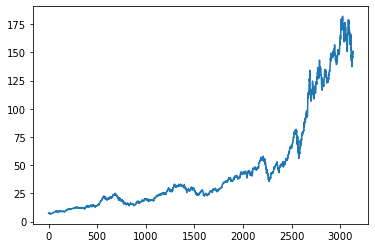

In [15]:
plt.plot(df.Close)

In [16]:
# WE MAKE USE OF MOVING AVG (CAL. AVG OF 1ST 100 CLOSE DATA VALUES, 101TH VALUE IS AVG OF THOSE 100 VALUES)

ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3124    163.4297
3125    163.1968
3126    162.9872
3127    162.7191
3128    162.4297
Name: Close, Length: 3129, dtype: float64

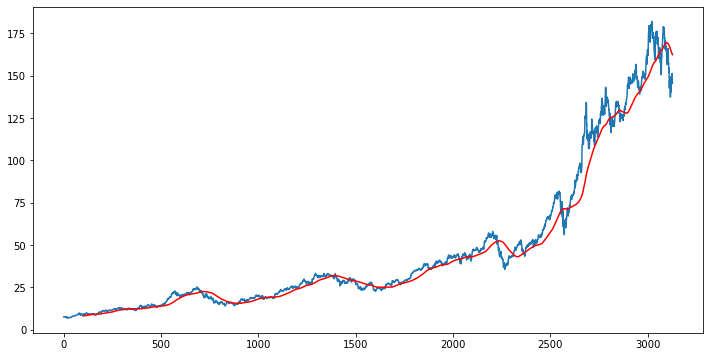

In [17]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [18]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3124    159.49870
3125    159.48665
3126    159.49175
3127    159.48685
3128    159.48405
Name: Close, Length: 3129, dtype: float64

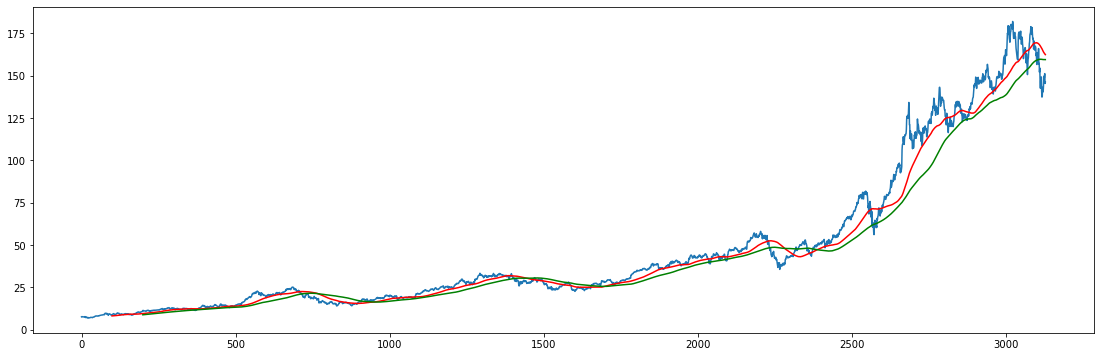

In [19]:
# PLOTTING 100 DAYS MA AND 200 DAYS MA 

plt.figure(figsize=(19,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [20]:
df.shape

(3129, 5)

In [21]:
# SPLITTING DATA INTO TRAINING AND TEST DATASETS ; 70-30 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2190, 1)
(939, 1)


In [22]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [23]:
data_testing.head()

,Close
2190,56.602501
2191,55.959999
2192,54.470001
2193,54.560001
2194,54.592499


In [24]:
# WE NEED TO SALE THE TRAINA AND TEST 'CLOSE' DATA AS WE CANNOT TAKE IN the form of 55.775002,55.325001 etc is scaled to values b/w 0 to 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.9500807 ],
       [0.97755376],
       [0.96371771]])

In [27]:
# SPLIT THE DATA INTO TRAIN AND TEST

x_train = []

y_train = []

#  HERE WE MAKE USE OF TIME SERIES METHOD: X_TRAIN WILL BE PREV 100 DAYS VALUES AND 101th VALUE WILL BE Y_TRAIN 

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [45]:
x_train.shape

(2090, 100, 1)

In [28]:
# ML MODEL

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences= True, 
                   input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [31]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train,y_train,epochs =50)

Epoch 1/50
66/66 [==============================] - 28s 301ms/step - loss: 0.0259
Epoch 2/50
66/66 [==============================] - 16s 240ms/step - loss: 0.0057
Epoch 3/50
66/66 [==============================] - 16s 240ms/step - loss: 0.0055
Epoch 4/50
66/66 [==============================] - 15s 224ms/step - loss: 0.0048
Epoch 5/50
66/66 [==============================] - 13s 201ms/step - loss: 0.0046
Epoch 6/50
66/66 [==============================] - 13s 190ms/step - loss: 0.0042
Epoch 7/50
66/66 [==============================] - 13s 196ms/step - loss: 0.0043
Epoch 8/50
66/66 [==============================] - 15s 221ms/step - loss: 0.0036
Epoch 9/50
66/66 [==============================] - 15s 227ms/step - loss: 0.0040
Epoch 10/50
66/66 [==============================] - 17s 250ms/step - loss: 0.0035
Epoch 11/50
66/66 [==============================] - 14s 214ms/step - loss: 0.0037
Epoch 12/50
66/66 [==============================] - 12s 188ms/step - loss: 0.0034
Epoch 13/50
6

In [32]:
# NOW THAT OUR MODEL IS TRAINED WE NEED TO SAVE THE MODEL FOR WEB APP

model.save('keras_model.h5')

In [33]:
data_testing.head() # starts from 2190

,Close
2190,56.602501
2191,55.959999
2192,54.470001
2193,54.560001
2194,54.592499


In [35]:
data_training.head()  # data till 2189 

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [36]:
past_100_Days = data_training.tail(100)

In [37]:
final_df = past_100_Days.append(data_testing, ignore_index = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10060\4034931291.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_Days.append(data_testing, ignore_index = True)


In [38]:
final_df.head() 
# we need to sacle thhis data

,Close
0,41.310001
1,40.735001
2,40.912498
3,41.055000
4,40.580002


In [39]:
input_data = scaler.fit_transform(final_df)

input_data

array([[0.03934455],
       [0.03541862],
       [0.03663052],
       ...,
       [0.78970734],
       [0.74990191],
       [0.75509092]])

In [40]:
input_data.shape  # 1 here is close column 

(1039, 1)

In [41]:
x_test = []

y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [42]:
# convert into numpy arrays

x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(939, 100, 1)
(939,)


In [43]:
# MAKING PREDICTIONS

y_predicted = model.predict(x_test)


30/30 [==============================] - 3s 83ms/step


In [44]:
y_predicted.shape

(939, 1)

In [45]:
y_test

array([0.14375694, 0.13937014, 0.1291969 , 0.1298114 , 0.13003328,
       0.13286677, 0.12882138, 0.13416403, 0.13655373, 0.13353247,
       0.14126483, 0.14261331, 0.14520781, 0.1486558 , 0.15341813,
       0.14645388, 0.14013825, 0.13925067, 0.14454211, 0.12660237,
       0.12334215, 0.13641717, 0.1283093 , 0.13648544, 0.13484681,
       0.12602203, 0.13163779, 0.13392506, 0.13747546, 0.12443458,
       0.13247419, 0.12649996, 0.11956987, 0.1213792 , 0.13086968,
       0.13660494, 0.1114449 , 0.10139113, 0.10511224, 0.115661  ,
       0.11316891, 0.10630708, 0.08872578, 0.08541435, 0.07614578,
       0.08401469, 0.08763335, 0.07454126, 0.05938379, 0.05904241,
       0.05137833, 0.05535546, 0.05470684, 0.06614321, 0.06377059,
       0.06211488, 0.07276608, 0.0588888 , 0.05552616, 0.04489204,
       0.04678673, 0.04513101, 0.04593327, 0.04909106, 0.03975419,
       0.03712555, 0.0407613 , 0.03191943, 0.02498933, 0.0145771 ,
       0.00792012, 0.02556968, 0.02382861, 0.02396517, 0.02654

In [46]:
y_predicted

array([[0.18657312],
       [0.1875852 ],
       [0.1884331 ],
       [0.1891003 ],
       [0.18957308],
       [0.18984823],
       [0.18994145],
       [0.18986645],
       [0.18965721],
       [0.18936042],
       [0.18901004],
       [0.18866326],
       [0.1883769 ],
       [0.18820405],
       [0.18819502],
       [0.188401  ],
       [0.18881619],
       [0.18938255],
       [0.19002765],
       [0.1907043 ],
       [0.191326  ],
       [0.19180961],
       [0.19212447],
       [0.19224826],
       [0.19219628],
       [0.19199474],
       [0.19165242],
       [0.19119251],
       [0.19065064],
       [0.19007555],
       [0.18947235],
       [0.18885937],
       [0.18823762],
       [0.18759023],
       [0.18690446],
       [0.18620321],
       [0.18553929],
       [0.18489358],
       [0.18421733],
       [0.1834724 ],
       [0.18265218],
       [0.18176097],
       [0.18079898],
       [0.17974669],
       [0.17858472],
       [0.17729273],
       [0.17587063],
       [0.174

In [47]:
# now scale it up above predicted values

scaler.scale_

array([0.00682769])

In [48]:
scale_factor = 1/0.00682769

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

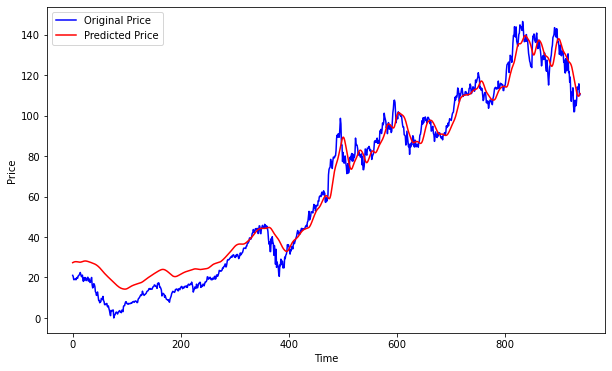

In [49]:
# PLOT PREDICTED AND ORIGINAL VALUES

plt.figure(figsize=(10,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()